# LightGBM

In [1]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def load_preprocessed_data(data_path: str, label_col: str):
    df = pd.read_csv(data_path)
    y = df[label_col]
    X = df.drop(columns=label_col)
    return X, y

## 1. Cleaned dataset w/o feat eng variables

### a. Base model

In [3]:
data_path_train_1 = "data/train/baseline_train.csv"
data_path_val_1 = "data/train/baseline_val.csv"
label_col_1 = "monthly_rent"

In [4]:
X_train_1, y_train_1 = load_preprocessed_data(data_path_train_1, label_col_1)
X_val_1, y_val_1 = load_preprocessed_data(data_path_val_1, label_col_1)

In [5]:
model_1 = HistGradientBoostingRegressor(
    learning_rate = 0.1,
    max_iter = 100,
    max_leaf_nodes = 31,
    max_depth = None,
    min_samples_leaf = 20,
)
model_1.fit(X_train_1, y_train_1)

HistGradientBoostingRegressor()

In [6]:
y_train_pred_1 = model_1.predict(X_train_1)
mse_train_1 = mean_squared_error(y_train_1, y_train_pred_1)
score_train_1 = model_1.score(X_train_1, y_train_1)
print(f"Training: MSE = {mse_train_1}, Score = {score_train_1}")

Training: MSE = 221632.63300177167, Score = 0.5682950931928297


In [7]:
y_val_pred_1 = model_1.predict(X_val_1)
mse_val_1 = mean_squared_error(y_val_1, y_val_pred_1)
score_val_1 = model_1.score(X_val_1, y_val_1)
print(f"Validation: MSE = {mse_val_1}, Score = {score_val_1}")

Validation: MSE = 225867.27545940378, Score = 0.5392711620737172


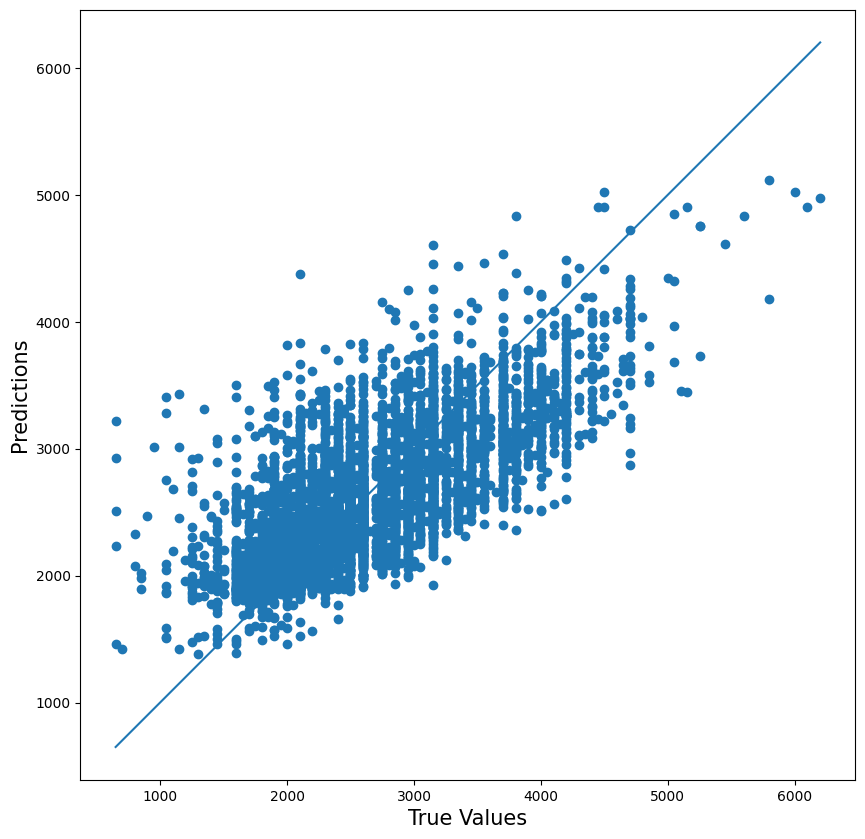

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(y_val_1, y_val_pred_1)
p1 = max(max(y_val_pred_1), max(y_val_1))
p2 = min(min(y_val_pred_1), min(y_val_1))
plt.plot([p1, p2], [p1, p2])
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()

### b. Hyperparameter search

In [9]:
param_space_1 = {
    "learning_rate": stats.loguniform(1e-2, 1e0),
    "max_iter": [100, 1000],
    "max_leaf_nodes": [None, 31],
    "min_samples_leaf": stats.randint(10, 40),
    "l2_regularization": [0, 0.1],
}

In [10]:
search_model_1 = RandomizedSearchCV(
    estimator=HistGradientBoostingRegressor(),
    param_distributions=param_space_1,
    n_iter=20,
)
search_model_1.fit(X_train_1, y_train_1)

RandomizedSearchCV(estimator=HistGradientBoostingRegressor(), n_iter=20,
                   param_distributions={'l2_regularization': [0, 0.1],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C96F1FB050>,
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [None, 31],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C96E984B90>})

In [27]:
search_model_1.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.03331550978139406,
 'max_iter': 1000,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 35}

In [28]:
y_train_pred_1 = search_model_1.predict(X_train_1)
mse_train_1 = mean_squared_error(y_train_1, y_train_pred_1)
score_train_1 = search_model_1.score(X_train_1, y_train_1)
print(f"Training: MSE = {mse_train_1}, Score = {score_train_1}")

Training: MSE = 218706.55316239668, Score = 0.5739946285331765


In [29]:
y_val_pred_1 = search_model_1.predict(X_val_1)
mse_val_1 = mean_squared_error(y_val_1, y_val_pred_1)
score_val_1 = search_model_1.score(X_val_1, y_val_1)
print(f"Validation: MSE = {mse_val_1}, Score = {score_val_1}")

Validation: MSE = 224391.62770703362, Score = 0.542281219518981


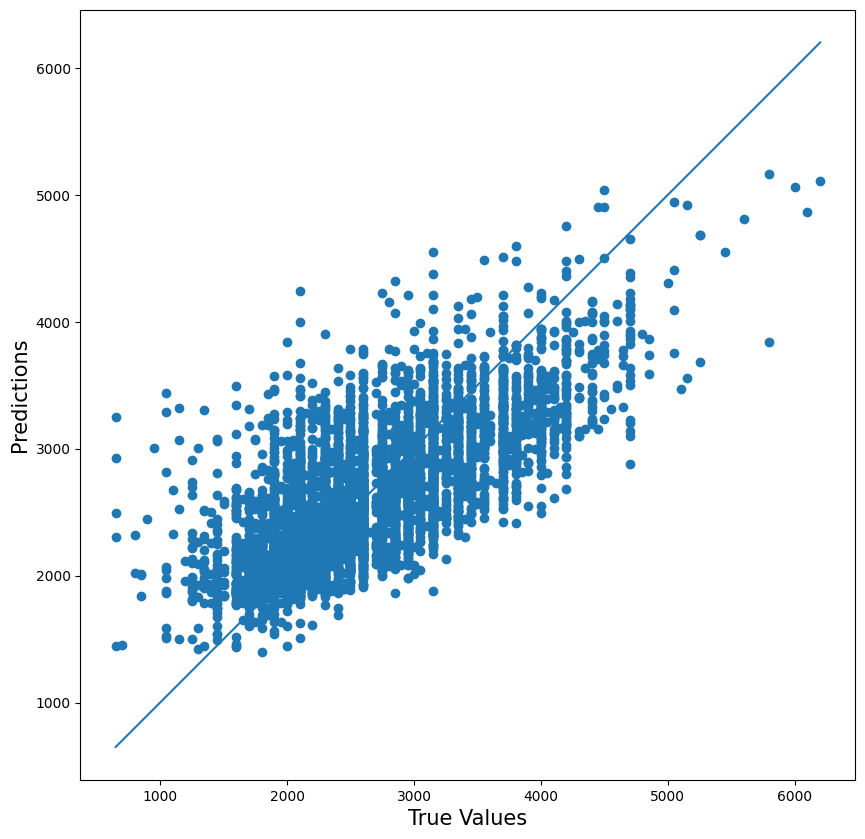

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(y_val_1, y_val_pred_1)
p1 = max(max(y_val_pred_1), max(y_val_1))
p2 = min(min(y_val_pred_1), min(y_val_1))
plt.plot([p1, p2], [p1, p2])
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()

## 2. Cleaned dataset w/ feat eng variables

In [11]:
data_path_train_2 = "data/train/baseline_w_feature_eng_train.csv"
data_path_val_2 = "data/train/baseline_w_feature_eng_val.csv"
label_col_2 = "monthly_rent"

In [12]:
X_train_2, y_train_2 = load_preprocessed_data(data_path_train_2, label_col_2)
X_val_2, y_val_2 = load_preprocessed_data(data_path_val_2, label_col_2)

In [13]:
model_2 = HistGradientBoostingRegressor(
    learning_rate = 0.1,
    max_iter = 100,
    max_leaf_nodes = 31,
    max_depth = None,
    min_samples_leaf = 20,
)
model_2.fit(X_train_2, y_train_2)

HistGradientBoostingRegressor()

In [14]:
y_val_pred_2 = model_2.predict(X_train_2)
mse_val_2 = mean_squared_error(y_train_2, y_val_pred_2)
score_val_2 = model_2.score(X_train_2, y_train_2)
print(f"Training: MSE = {mse_val_2}, Score = {score_val_2}")

Training: MSE = 221012.8169650662, Score = 0.5695331757174349


In [15]:
y_val_pred_2 = model_2.predict(X_val_2)
mse_val_2 = mean_squared_error(y_val_2, y_val_pred_2)
score_val_2 = model_2.score(X_val_2, y_val_2)
print(f"Validation: MSE = {mse_val_2}, Score = {score_val_2}")

Validation: MSE = 226375.227678267, Score = 0.5383541817879245


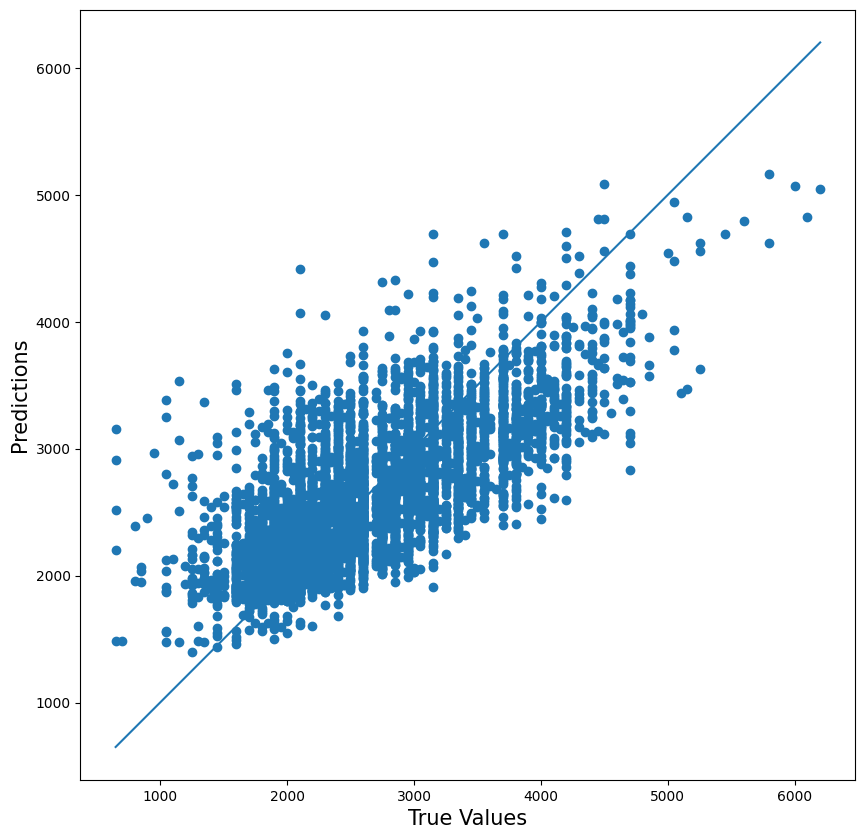

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(y_val_2, y_val_pred_2)
p1 = max(max(y_val_pred_2), max(y_val_2))
p2 = min(min(y_val_pred_2), min(y_val_2))
plt.plot([p1, p2], [p1, p2])
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()

In [17]:
param_space_2 = {
    "learning_rate": stats.loguniform(1e-2, 1e0),
    "max_iter": [100, 1000],
    "max_leaf_nodes": [None, 31],
    "min_samples_leaf": stats.randint(10, 40),
    "l2_regularization": [0, 0.1],
}

In [18]:
search_model_2 = RandomizedSearchCV(
    estimator=HistGradientBoostingRegressor(),
    param_distributions=param_space_2,
    n_iter=20,
)
search_model_2.fit(X_train_2, y_train_2)

RandomizedSearchCV(estimator=HistGradientBoostingRegressor(), n_iter=20,
                   param_distributions={'l2_regularization': [0, 0.1],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C96F1BB210>,
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [None, 31],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C96F1BA890>})

In [31]:
search_model_2.best_params_

{'l2_regularization': 0.1,
 'learning_rate': 0.01025859691861125,
 'max_iter': 1000,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 38}

In [32]:
y_train_pred_2 = search_model_2.predict(X_train_2)
mse_train_2 = mean_squared_error(y_train_2, y_train_pred_2)
score_train_2 = search_model_2.score(X_train_2, y_train_2)
print(f"Training: MSE = {mse_train_2}, Score = {score_train_2}")

Training: MSE = 221042.99662284544, Score = 0.5694743947760371


In [33]:
y_val_pred_2 = search_model_2.predict(X_val_2)
mse_val_2 = mean_squared_error(y_val_2, y_val_pred_2)
score_val_2 = search_model_2.score(X_val_2, y_val_2)
print(f"Validation: MSE = {mse_val_2}, Score = {score_val_2}")

Validation: MSE = 225879.2055458125, Score = 0.5393657171292107


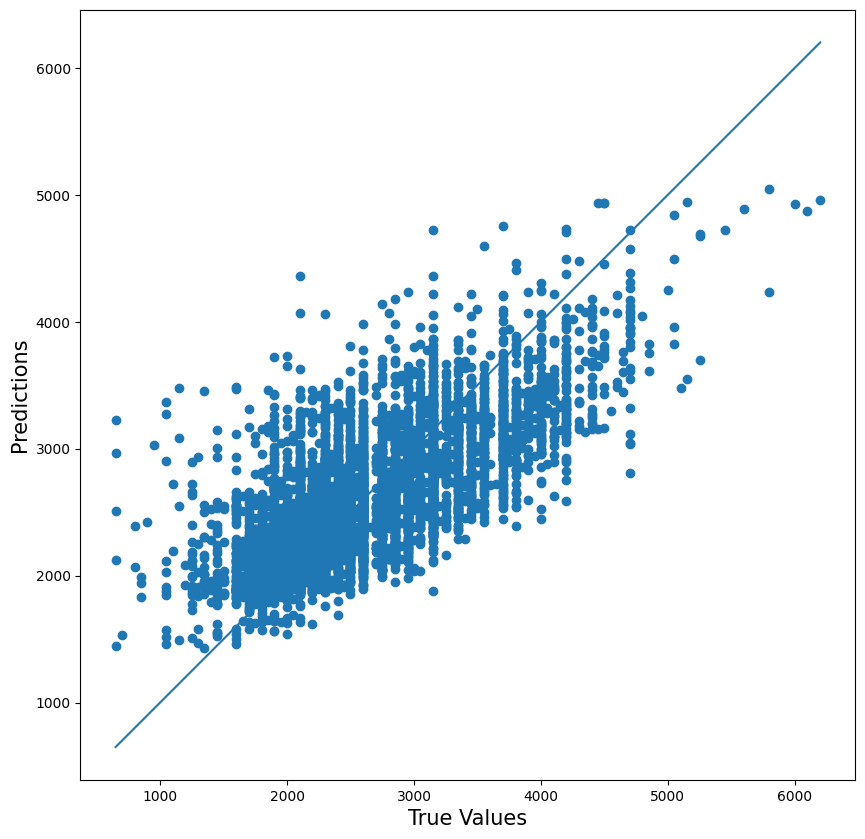

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_val_2, y_val_pred_2)
p1 = max(max(y_val_pred_2), max(y_val_2))
p2 = min(min(y_val_pred_2), min(y_val_2))
plt.plot([p1, p2], [p1, p2])
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()

## 3. Cleaned dataset w/o feat eng variables (Price per sqm as label)

In [19]:
data_path_train_3 = "data/train/feature_eng_ppsm_train.csv"
data_path_val_3 = "data/train/feature_eng_ppsm_val.csv"
label_col_3 = "rent_per_sqm"

In [20]:
X_train_3, y_train_3 = load_preprocessed_data(data_path_train_3, label_col_3)
X_val_3, y_val_3 = load_preprocessed_data(data_path_val_3, label_col_3)

In [21]:
model_3 = HistGradientBoostingRegressor(
    learning_rate = 0.1,
    max_iter = 100,
    max_leaf_nodes = 31,
    max_depth = None,
    min_samples_leaf = 20,
)
model_3.fit(X_train_3, y_train_3)

HistGradientBoostingRegressor()

In [22]:
y_val_pred_3 = model_3.predict(X_train_3)
mse_val_3 = mean_squared_error(y_train_3, y_val_pred_3)
score_val_3 = model_3.score(X_train_3, y_train_3)
print(f"Training: MSE = {mse_val_3}, Score = {score_val_3}")

Training: MSE = 30.012155094131966, Score = 0.6339099790423013


In [23]:
y_val_pred_3 = model_3.predict(X_val_3)
mse_val_3 = mean_squared_error(y_val_3, y_val_pred_3)
score_val_3 = model_3.score(X_val_3, y_val_3)
print(f"Validation: MSE = {mse_val_3}, Score = {score_val_3}")

Validation: MSE = 31.494774358146728, Score = 0.6062445391674558


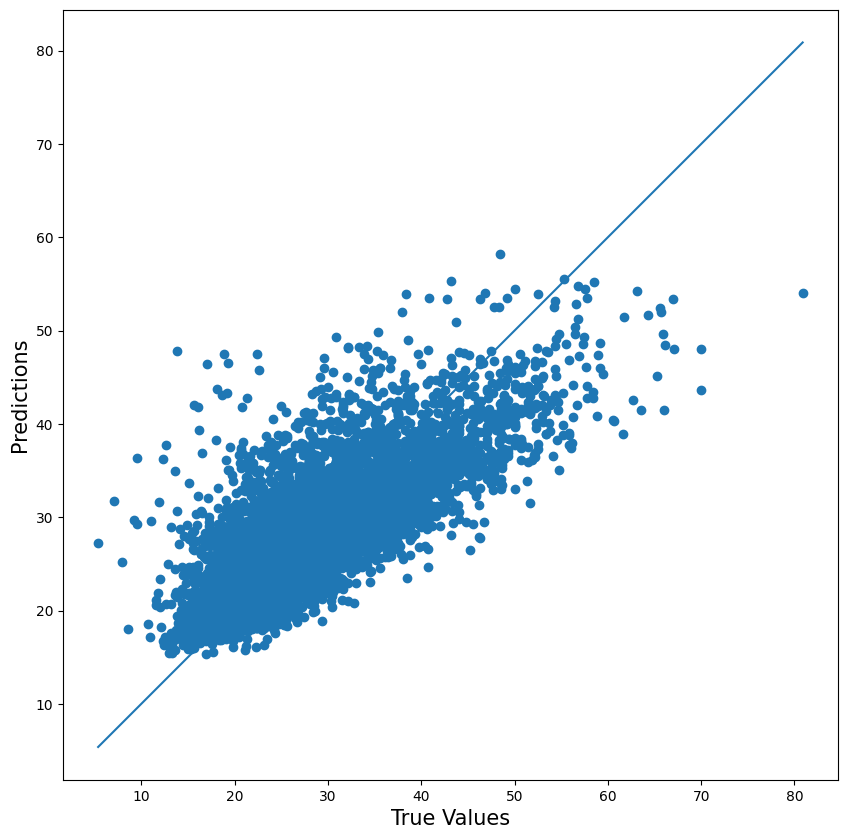

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(y_val_3, y_val_pred_3)
p1 = max(max(y_val_pred_3), max(y_val_3))
p2 = min(min(y_val_pred_3), min(y_val_3))
plt.plot([p1, p2], [p1, p2])
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()

In [25]:
param_space_3 = {
    "learning_rate": stats.loguniform(1e-2, 1e0),
    "max_iter": [100, 1000],
    "max_leaf_nodes": [None, 31],
    "min_samples_leaf": stats.randint(10, 40),
    "l2_regularization": [0, 0.1],
}

In [26]:
search_model_3 = RandomizedSearchCV(
    estimator=HistGradientBoostingRegressor(),
    param_distributions=param_space_3,
    n_iter=20,
)
search_model_3.fit(X_train_3, y_train_3)

RandomizedSearchCV(estimator=HistGradientBoostingRegressor(), n_iter=20,
                   param_distributions={'l2_regularization': [0, 0.1],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C920019E10>,
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [None, 31],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C9202B8B10>})

In [35]:
search_model_3.best_params_

{'l2_regularization': 0.1,
 'learning_rate': 0.1183785712302776,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 26}

In [36]:
y_train_pred_3 = search_model_3.predict(X_train_3)
mse_train_3 = mean_squared_error(y_train_3, y_train_pred_3)
score_train_3 = search_model_3.score(X_train_3, y_train_3)
print(f"Training: MSE = {mse_train_3}, Score = {score_train_3}")

Training: MSE = 29.71149797820719, Score = 0.6375774121048307


In [37]:
y_val_pred_3 = search_model_3.predict(X_val_3)
mse_val_3 = mean_squared_error(y_val_3, y_val_pred_3)
score_val_3 = search_model_3.score(X_val_3, y_val_3)
print(f"Validation: MSE = {mse_val_3}, Score = {score_val_3}")

Validation: MSE = 31.655289012638352, Score = 0.604237745245677


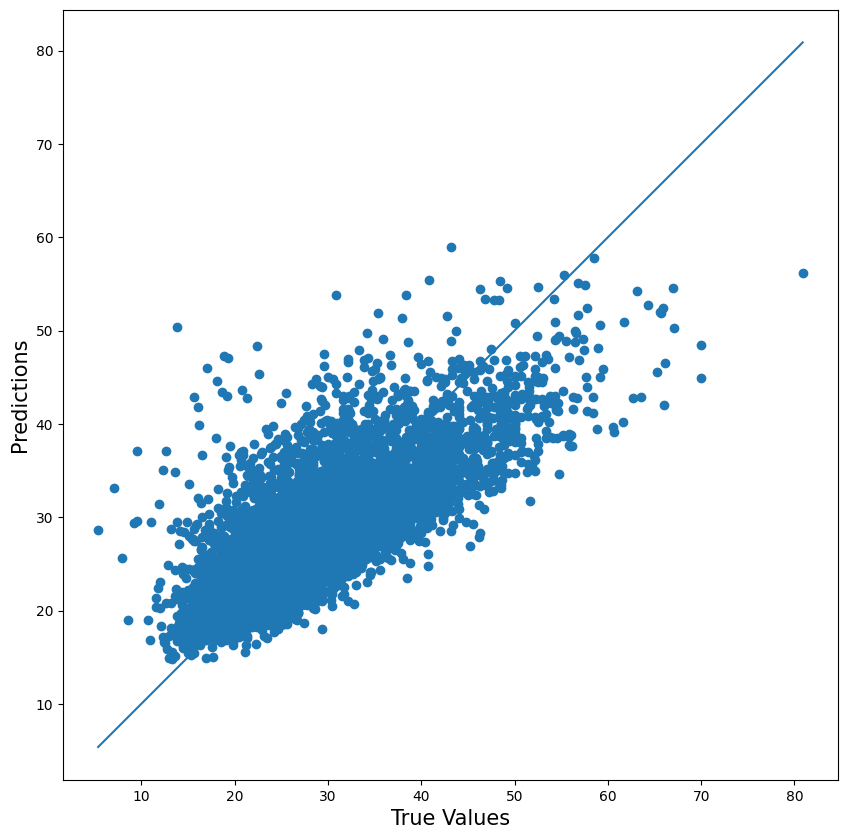

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_val_3, y_val_pred_3)
p1 = max(max(y_val_pred_3), max(y_val_3))
p2 = min(min(y_val_pred_3), min(y_val_3))
plt.plot([p1, p2], [p1, p2])
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis("equal")
plt.show()